In [1]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchaudio

from torch.utils.data import Sampler
from torch.utils.data import Dataset

NO DOWNSAMPLING IF USING SPECTROGRAM

In [3]:
min_seq = 1
max_seq = 3
downsampling = 4

In [4]:
path_train_voxceleb = "../data/VoxCeleb/prepared_data/train/"

In [5]:
sample_audio = ""
for root, folders, files in os.walk(path_train_voxceleb):
    if files:
        print(root)
        print(folders)
        print(files)
        sample_audio = os.path.join(root, files[0])
        break;

../data/VoxCeleb/prepared_data/train/aac/id08149/msudF6HwuuI
[]
['00046.wav']


In [6]:
sample_audio

'../data/VoxCeleb/prepared_data/train/aac/id08149/msudF6HwuuI/00046.wav'

In [7]:
sample, samplerate = torchaudio.load(sample_audio)

Shape of waveform: torch.Size([1, 80896])
Sample rate of waveform: 16000


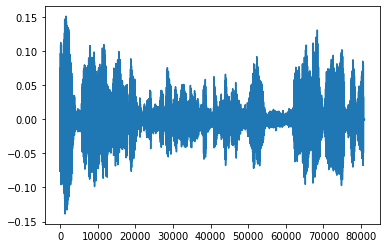

In [8]:
print("Shape of waveform: {}".format(sample.size()))
print("Sample rate of waveform: {}".format(samplerate))

plt.figure()
plt.plot(sample.t().numpy())

In [9]:
#random sequence length between min and max length
if (int)(sample.shape[-1]/samplerate) >= max_seq:
    seq_length = (int)(random.uniform(min_seq, max_seq)*samplerate)
    print(seq_length)
    index = random.randrange(0,sample.shape[-1]-seq_length)
    sample = sample[:,index:index+seq_length]

#add padding at the end to make max length sequence
padding = torch.zeros(max_seq*samplerate - sample.shape[-1]).unsqueeze(0)
sample = torch.cat((sample,padding),1)

#downsample kHz
#sample = sample[:,::downsampling]

28070


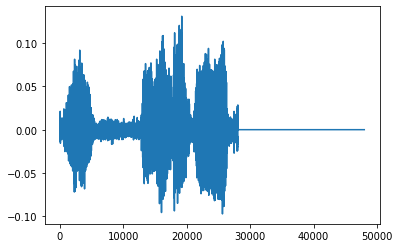

In [10]:
plt.figure()
plt.plot(sample.t().numpy())

In [11]:
sample = sample[:,:16000]

In [12]:
sample.shape

torch.Size([1, 16000])

In [13]:
spectrogram = torchaudio.transforms.Spectrogram(n_fft=255, hop_length=160)(sample)

Shape of spectrogram: torch.Size([1, 128, 100])


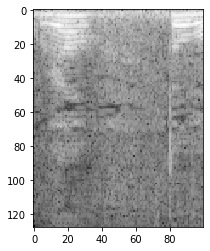

In [14]:
print("Shape of spectrogram: {}".format(spectrogram.size()))

plt.figure()
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='gray')

In [15]:
spectrogram.shape

torch.Size([1, 128, 100])

### ResNet time dimension dynamic average pooling calculator

In [93]:
def time_standard(time):
    return((int)((time - 3)/2) + 1)

In [94]:
def time_freq_calc(time):
    time = (int)((time - 7)/2) + 1
    time = time_standard(time_standard(time_standard(time_standard(time))))
    return(time)

In [119]:
time = 300

In [120]:
answer = time_freq_calc(time)

In [121]:
answer

8

### Dataloader handling different image shapes

In [55]:
x = torch.randn(1, 1, 128, 300, device='cpu', dtype=torch.float)

In [56]:
x.shape

torch.Size([1, 1, 128, 300])

In [57]:
def test(batch):
    data = torch.stack([item[0] for item in batch])
    mask = [item[1] for item in batch]
    #target = torch.LongTensor([item[2] for item in batch])

    return data, mask

In [58]:
data, mask = test(x)

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [49]:
data.shape

torch.Size([1, 300])

In [52]:
len(mask)

1

In [53]:
mask[0].shape

torch.Size([300])

In [54]:
mask[0]

tensor([-2.1996e+00, -5.5469e-01,  9.1212e-01,  4.1452e-01,  1.1024e+00,
         1.4215e+00,  1.4202e+00, -4.5255e-01, -6.0279e-01, -2.7727e-01,
        -1.8318e+00, -5.0641e-01, -3.6128e-02, -1.3784e+00,  5.5666e-01,
        -7.4337e-02,  2.3863e-02, -1.2723e+00,  4.3743e-01, -5.5002e-01,
         1.1503e+00,  1.9497e-01,  4.9364e-01,  5.2506e-02,  4.5564e-01,
        -2.0124e+00,  3.7026e-01, -1.5230e-01,  4.0346e-01,  4.6320e-03,
        -1.0802e-01,  4.5873e-01, -1.3909e-01, -7.4482e-02, -5.7315e-01,
         4.6426e-01,  2.2567e-01, -5.8835e-01, -3.6242e-01, -1.1522e+00,
        -1.0929e+00, -1.3318e+00,  2.8596e-01,  4.4513e-01,  7.4469e-01,
        -6.6519e-03, -6.0158e-01,  1.2998e+00,  2.6369e-01,  1.7284e+00,
         6.4820e-01,  8.7113e-01,  9.7819e-01, -1.0929e+00, -1.2388e+00,
        -1.3827e+00, -4.0010e-01, -4.6219e-01,  4.5884e-01,  1.0085e+00,
        -5.0884e-01,  6.6141e-02,  6.5882e-01,  1.0687e+00, -1.2118e+00,
        -7.5732e-01, -1.3595e+00, -3.5795e-01, -1.2